<a href="https://colab.research.google.com/github/nescoba/portafolio/blob/main/02021759.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finantial Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [5]:
data_frames = []

for year in range(2014, 2019):
    # Adding column year
    df_year = pd.read_csv(f'/{year}_Financial_Data.csv')
    df_year['year'] = np.repeat(year, len(df_year))
    
    # Adding Symbol column
    df_year['Symbol'] = df_year['Unnamed: 0']
    df_year.drop('Unnamed: 0', axis=1, inplace=True)

    # Formating the Price Var column 
    df_year['Price Var [%]'] = df_year[f'{year + 1} PRICE VAR [%]']
    df_year.drop(f'{year + 1} PRICE VAR [%]', axis=1, inplace=True)
    
    data_frames.append(df_year)



df = pd.DataFrame({'Symbol': data_frames[0].Symbol})

for i in range(5):
    df = pd.merge(df, data_frames[i], how='outer')

df

,Symbol,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,year,Price Var [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,...,10.8869,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,NaN,0.0699,-0.0615,-0.0695,0.0323,0.0088,-0.0182,0.0355,0.0015,0.0260,0.0603,-0.0137,0.0060,0.1442,0.0353,0.0201,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-9.323276
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,NaN,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,...,NaN,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.0195,0.0000,0.2134,-0.3626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0,2014,-25.512193
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,...,18.2227,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.0317,0.2429,0.2095,0.3935,0.1027,0.1038,0.1399,0.0889,0.0937,0.0946,0.2272,0.0906,0.1892,0.0676,0.0558,0.0789,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,33.118297
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,0

In [6]:
transf_attribs = list(df.columns)
other_attribs = ['Symbol', 'Sector', 'Class', 'Price Var [%]']

for attrib in other_attribs:
  transf_attribs.remove(attrib)


In [7]:
X = df.loc[:, transf_attribs]

from sklearn.impute import SimpleImputer
X = SimpleImputer(strategy = 'median').fit_transform(X)

X[:, :5]

array([[ 7.44010000e+10, -7.13000000e-02,  3.90300000e+10,
         3.53710000e+10,  0.00000000e+00],
       [ 3.73414805e+09,  1.17370000e+00,  2.80562544e+09,
         9.28522603e+08,  1.08330320e+08],
       [ 9.83750000e+10,  1.82000000e-02,  7.81380000e+10,
         2.02370000e+10,  0.00000000e+00],
       ...,
       [ 5.48843810e+07,  2.21000000e-01,  3.65937920e+07,
         1.82905890e+07,  1.65263300e+06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.03171530e+07],
       [ 5.30190000e+07,  2.43000000e-02,  0.00000000e+00,
         5.30190000e+07,  5.66840000e+07]])

In [8]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

X

array([[ 2.23218832e+00, -1.12823069e-02,  1.45320689e+00, ...,
        -2.14671636e-02, -3.57069131e-02, -1.52145913e+00],
       [-3.78008932e-02, -7.09730029e-03, -8.22266704e-03, ...,
         1.13381617e-01,  9.86853785e-02, -1.52145913e+00],
       [ 3.00229085e+00, -1.09814570e-02,  3.03097290e+00, ...,
        -2.14671636e-02, -2.17451765e-02, -1.52145913e+00],
       ...,
       [-1.55987690e-01, -1.02997547e-02, -1.19935975e-01, ...,
        -1.71104829e-03,  3.99755711e-02,  1.38909528e+00],
       [-1.57750708e-01, -1.10426354e-02, -1.21412308e-01, ...,
         2.03490772e-01, -1.31213362e-02,  1.38909528e+00],
       [-1.56047610e-01, -1.09609522e-02, -1.21412308e-01, ...,
         7.79479269e-03,  1.80669269e-02,  1.38909528e+00]])

In [9]:
from sklearn.preprocessing import OneHotEncoder

sector = df['Sector'].to_numpy()
sector_encoded = OneHotEncoder(sparse=False).fit_transform(sector.reshape(-1,1))

sector_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X.shape

(22077, 222)

In [11]:
sector_encoded.shape

(22077, 11)

In [12]:
X = np.hstack((X, sector_encoded))

In [13]:
y = df['Class']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, 
                                                    train_size=.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, random_state=42, 
                                                    train_size=.2)

In [20]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=233))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 1s 20ms/step - loss: 0.6912 - accuracy: 0.5538 - val_loss: 0.6874 - val_accuracy: 0.5606
Epoch 2/30
28/28 [==============================] - 0s 9ms/step - loss: 0.6908 - accuracy: 0.5481 - val_loss: 0.6872 - val_accuracy: 0.5606
Epoch 3/30
28/28 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.5368 - val_loss: 0.6883 - val_accuracy: 0.5606
Epoch 4/30
28/28 [==============================] - 0s 15ms/step - loss: 0.6922 - accuracy: 0.5345 - val_loss: 0.6867 - val_accuracy: 0.5603
Epoch 5/30
28/28 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5436 - val_loss: 0.6889 - val_accuracy: 0.5583
Epoch 6/30
28/28 [==============================] - 0s 15ms/step - loss: 0.6927 - accuracy: 0.5357 - val_loss: 0.6902 - val_accuracy: 0.5612
Epoch 7/30
28/28 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.5470 - val_loss: 0.6928 - val_accuracy: 0.5473
Epoch 8/30
28/28 

(0.0, 1.0)

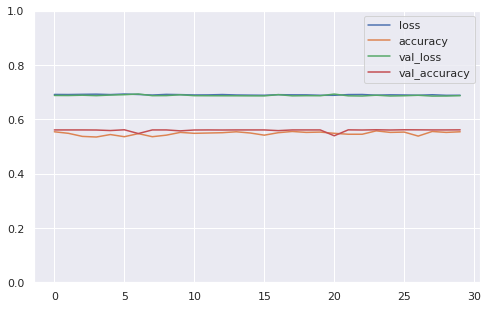

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)